 1) Load Dataset and Explore Target Imbalance

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_data.csv to train_data.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_predictions.csv to loan_predictions.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_approval_model.pkl to loan_approval_model.pkl


In [ ]:
print(df.columns.tolist())


['Gender', 'Married', 'Dependents', 'Education', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area', 'Prediction', 'ApplicantIncome', 'Self_Employed', 'Loan_Amount_Term']


Loan Status Distribution (%):
 Prediction
Rejected    70.588235
Approved    29.411765
Name: proportion, dtype: float64


/tmp/ipython-input-7-1989435941.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Prediction', data = df, palette = 'pastel')


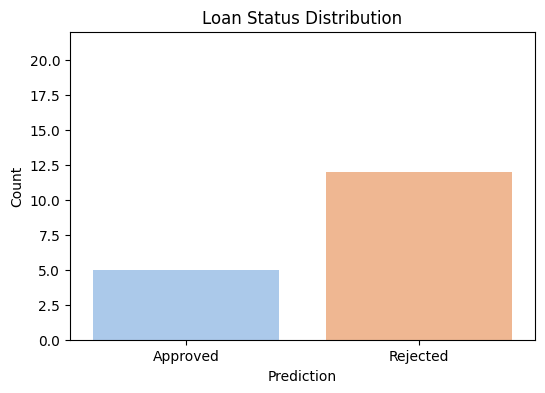

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('loan_predictions.csv')

loan_dist = df['Prediction'].value_counts(normalize = True) * 100
print('Loan Status Distribution (%):\n', loan_dist)

plt.figure(figsize = (6, 4))
sns.countplot(x = 'Prediction', data = df, palette = 'pastel')
plt.title('Loan Status Distribution')
plt.ylabel('Count')
plt.xlabel('Prediction')
plt.ylim(0, df['Prediction'].value_counts().max() + 10)
plt.show()

2) Check Approval Rates by Demographic Features

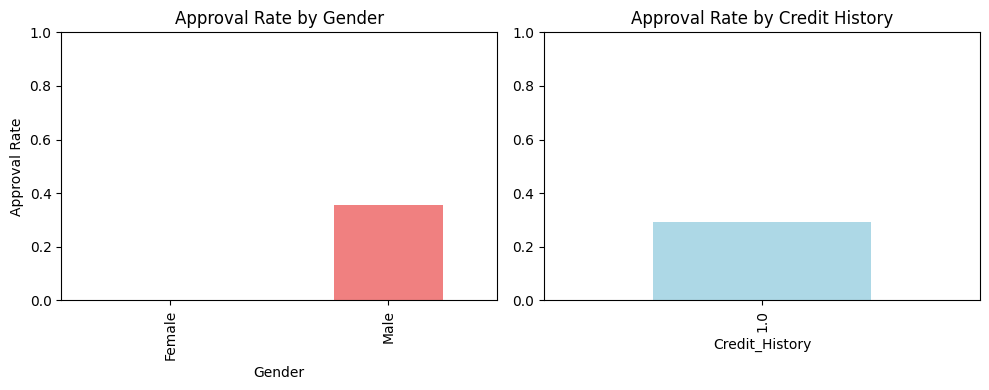

Approval Rate by Gender:
 Gender
Female    0.000000
Male      0.357143
Name: Prediction, dtype: float64

Approval Rate by Credit History:
 Credit_History
1.0    0.294118
Name: Prediction, dtype: float64


In [ ]:
gender_approval = df.groupby('Gender')['Prediction'].apply(lambda x: (x == 'Approved').mean())

credit_approval = df.groupby('Credit_History')['Prediction'].apply(lambda x: (x == 'Approved').mean())

plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
gender_approval.plot(kind = 'bar', color = 'lightcoral')
plt.title('Approval Rate by Gender')
plt.ylim(0, 1)
plt.ylabel('Approval Rate')

plt.subplot(1, 2, 2)
credit_approval.plot(kind = 'bar', color = 'lightblue')
plt.title('Approval Rate by Credit History')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

print('Approval Rate by Gender:\n', gender_approval)
print('\nApproval Rate by Credit History:\n', credit_approval)

3) Identifying the feature Imbalances

In [ ]:
print("Gender Distribution:\n", df['Gender'].value_counts(normalize = True) * 100)
print("\nCredit History Distribution:\n", credit_approval * 100)


Gender Distribution:
 Gender
Male      82.352941
Female    17.647059
Name: proportion, dtype: float64

Credit History Distribution:
 Credit_History
1.0    29.411765
Name: Prediction, dtype: float64


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_data.csv to train_data (2).csv


4) Evaluating the Model Performance Across Demographic Groups

In [ ]:
import pandas as pd

df = pd.read_csv('train_data.csv') #Loading the dataset

In [ ]:
#Preparing the features (X) and true labels(y)
X = df.drop(columns = ['Loan_Status']) #Defining the 'Loan_Status' being the column name
y = df['Loan_Status'].map({'Approved': 1, 'Rejected': 0}) #Encoding the target to 1/0

In [ ]:
print(y.isnull().sum())


614


In [ ]:
df_clean = df.dropna(subset=['Loan_Status'])


In [ ]:
print(df.shape)
print(df_clean.shape)


(614, 13)
(614, 13)


In [ ]:
print(df['Loan_Status'].isnull().sum())


0


In [ ]:
print("Columns in the dataset:\n", df.columns.tolist())

Columns in the dataset:
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [ ]:
import pandas as pd

df = pd.read_csv("train_data.csv")  # Use correct file
print(df.columns)  # Check Loan_Status exists
print(df['Loan_Status'].isna().sum())  # Should be 0


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
0


In [ ]:
X = df.drop(columns=['Loan_ID', 'Loan_Status'])  #Drop ID + target
y = df['Loan_Status']
print("Nulls in y:", y.isna().sum())


Nulls in y: 0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train value counts:\n", y_train.value_counts(normalize=True) * 100)
print("y_test value counts:\n", y_test.value_counts(normalize=True) * 100)


X_train shape: (491, 11)
X_test shape: (123, 11)
y_train value counts:
 Loan_Status
Y    68.635438
N    31.364562
Name: proportion, dtype: float64
y_test value counts:
 Loan_Status
Y    69.105691
N    30.894309
Name: proportion, dtype: float64


5) Bias Analysis

In [ ]:
#Making a copy and then adding target back for grouped analysis
train_df = X_train.copy()
train_df['Loan_Status'] = y_train.values

#Defining categorical sensitive features to examine
sensitive_features = ['Gender', 'Married', 'Education', 'Credit_History', 'Property_Area']

#Approval Rate across different groups
for feature in sensitive_features:
  group_approval = train_df.groupby(feature)['Loan_Status'].apply(lambda x: (x == 'Y').mean() * 100)
  print(f"\n Approval Rate by {feature}:\n{group_approval}")


 Approval Rate by Gender:
Gender
Female    70.114943
Male      68.447837
Name: Loan_Status, dtype: float64

 Approval Rate by Married:
Married
No     64.497041
Yes    70.532915
Name: Loan_Status, dtype: float64

 Approval Rate by Education:
Education
Graduate        70.789474
Not Graduate    61.261261
Name: Loan_Status, dtype: float64

 Approval Rate by Credit_History:
Credit_History
0.0     8.955224
1.0    79.002625
Name: Loan_Status, dtype: float64

 Approval Rate by Property_Area:
Property_Area
Rural        60.689655
Semiurban    77.717391
Urban        65.432099
Name: Loan_Status, dtype: float64


Visualising Bias

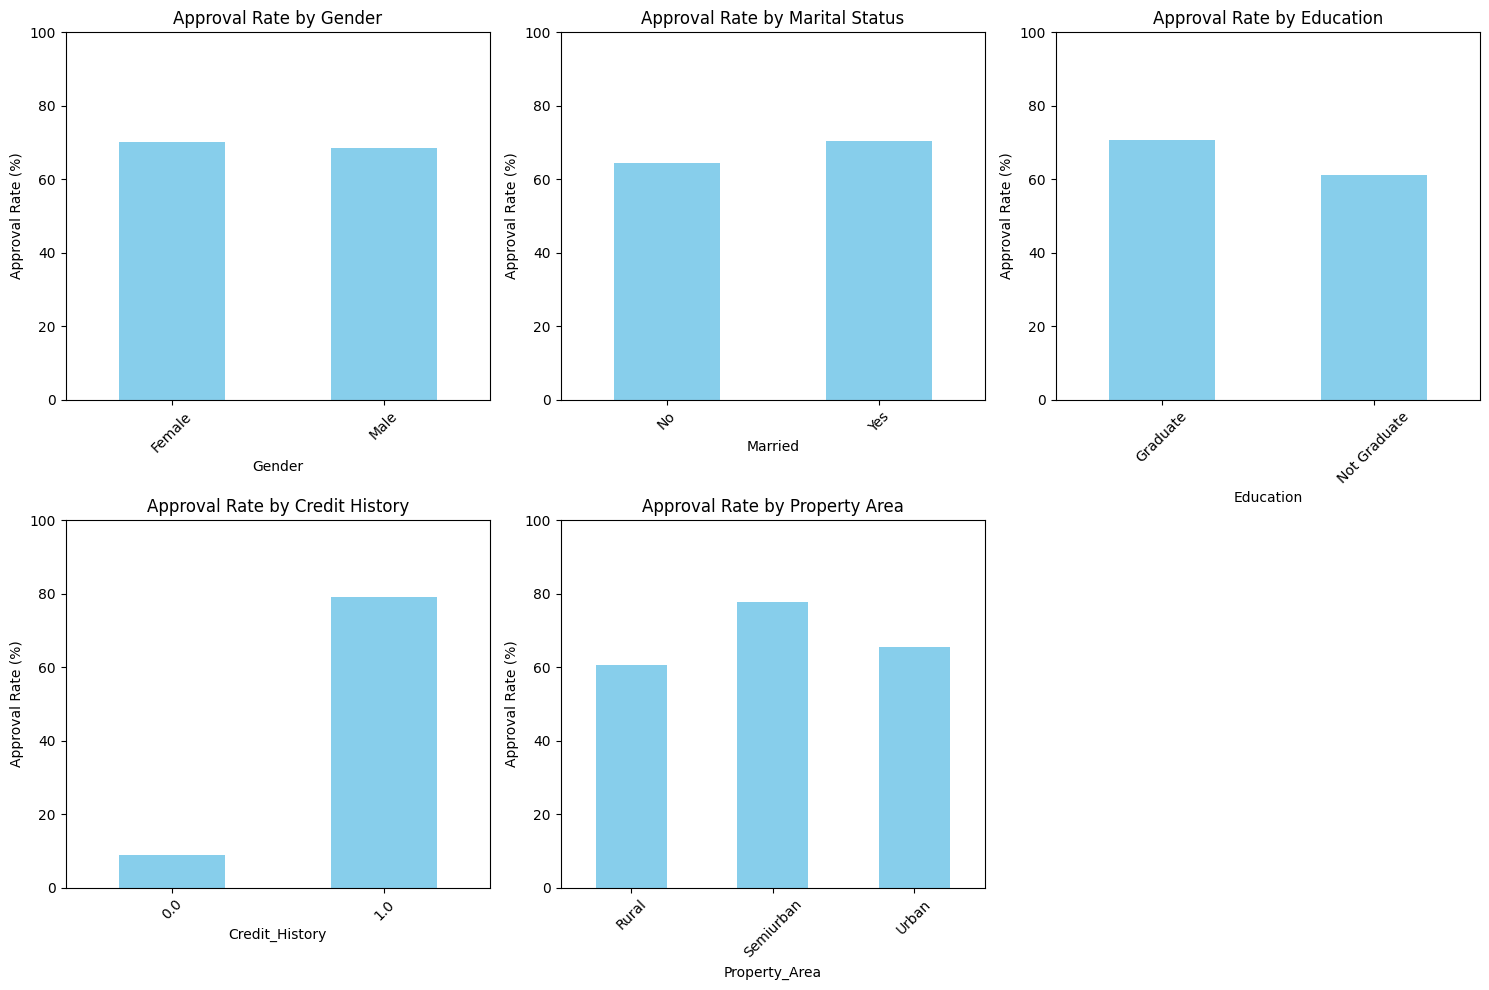

In [ ]:
import matplotlib.pyplot as plt

features = ['Gender', 'Married', 'Education', 'Credit_History', 'Property_Area']
titles = ['Approval Rate by Gender', 'Approval Rate by Marital Status',
          'Approval Rate by Education', 'Approval Rate by Credit History',
          'Approval Rate by Property Area']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    group_approval = train_df.groupby(feature)['Loan_Status'].apply(lambda x: (x == 'Y').mean() * 100)
    group_approval.plot(kind = 'bar', color = 'skyblue')
    plt.title(titles[i])
    plt.ylabel('Approval Rate (%)')
    plt.ylim(0, 100)
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()


Compare Predictions vs Actuals

In [2]:
from google.colab import files
uploaded = files.upload()

Saving loan_approval_model.pkl to loan_approval_model.pkl


In [3]:
import joblib

pipeline = joblib.load('loan_approval_model.pkl')

In [6]:
from google.colab import files
uploaded = files.upload()

Saving train_data.csv to train_data.csv


In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd

#Loading the original dataset
df = pd.read_csv('train_data.csv')

#Dropping rows with missing target
df = df.dropna(subset=['Loan_Status'])

#Separating the features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [10]:
#Separating the column types
categorical_cols = X_test.select_dtypes(include='object').columns
numerical_cols = X_test.select_dtypes(include=['int64', 'float64']).columns

#Filling the missing categorical values
X_test[categorical_cols] = X_test[categorical_cols].fillna('Missing')

#Filling the missing numerical values
X_test[numerical_cols] = X_test[numerical_cols].fillna(X_test[numerical_cols].mean())


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

#Defining the column types
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

#Pipelines
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean'))
])

preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, categorical_cols),
    ('num', num_pipeline, numerical_cols)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBClassifier())
])



#Mapping target labels to 0/1
y_train = y_train.map({'N': 0, 'Y': 1})
y_test = y_test.map({'N': 0, 'Y': 1})


In [15]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Loan_ID', 'Gender',
                                                   'Married', 'Dependents',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['ApplicantIncom...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [16]:
y_pred = pipeline.predict(X_test)


In [17]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

bias_df = X_test.copy()
bias_df['Actual'] = y_test.values
bias_df['Predicted'] = y_pred

print('Gender-wise Approval Rates:\n')

gender_actual = bias_df.groupby('Gender')['Actual'].apply(lambda x: (x == 'Y').mean() * 100)
gender_pred = bias_df.groupby('Gender')['Predicted'].apply(lambda x: (x == 'Y').mean() * 100)

print('Actual:\n', gender_actual)
print('\nPredicted:\n', gender_pred)

print('\n Credit History-wise Approval Rates:\n')

credit_actual = bias_df.groupby('Credit_History')['Actual'].apply(lambda x: (x == 'Y').mean() * 100)
credit_pred = bias_df.groupby('Credit_History')['Predicted'].apply(lambda x: (x == 'Y').mean() * 100)

print('Actual:\n', credit_actual)
print('\nPredicted:\n', credit_pred)

Gender-wise Approval Rates:

Actual:
 Gender
Female     0.0
Male       0.0
Missing    0.0
Name: Actual, dtype: float64

Predicted:
 Gender
Female     0.0
Male       0.0
Missing    0.0
Name: Predicted, dtype: float64

 Credit History-wise Approval Rates:

Actual:
 Credit_History
0.000000    0.0
0.810345    0.0
1.000000    0.0
Name: Actual, dtype: float64

Predicted:
 Credit_History
0.000000    0.0
0.810345    0.0
1.000000    0.0
Name: Predicted, dtype: float64


Fairness Metrics Per Group

In [19]:
print("Bias DataFrame columns:", bias_df.columns.tolist())
print("\nUnique values in Gender:", bias_df['Gender'].unique())
print("Unique values in Credit_History:", bias_df['Credit_History'].unique())

print("\ny_true unique values:", bias_df['y_true'].unique())
print("y_pred unique values:", bias_df['y_pred'].unique())

print("\nNon-null Gender count:", bias_df['Gender'].notna().sum())
print("Non-null Credit_History count:", bias_df['Credit_History'].notna().sum())


Bias DataFrame columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'y_true', 'y_pred']

Unique values in Gender: ['Male' 'Female' 'Missing']
Unique values in Credit_History: [0.         1.         0.81034483]

y_true unique values: [0 1]
y_pred unique values: [0 1]

Non-null Gender count: 123
Non-null Credit_History count: 123


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

def print_group_metrics(df, group_col, y_true, y_pred):
    print(f"\nFairness Metrics by {group_col}:\n")

#Defining valid groups depending on the column
    if group_col == 'Gender':
        valid_groups = ['Male', 'Female']
    elif group_col == 'Credit_History':
        valid_groups = [0.0, 1.0]
    else:
        valid_groups = df[group_col].dropna().unique()

    for group in valid_groups:
        idx = df[group_col] == group
        if sum(idx) == 0:
            continue
        print(f"{group_col} = {group}")
        print('Precision:', precision_score(y_true[idx], y_pred[idx]))
        print('Recall:', recall_score(y_true[idx], y_pred[idx]))
        print('F1 Score:', f1_score(y_true[idx], y_pred[idx]))
        print("-" * 40)

bias_df = X_test.copy()
bias_df['y_true'] = y_test.values
bias_df['y_pred'] = y_pred

print_group_metrics(bias_df, 'Gender', bias_df['y_true'], bias_df['y_pred'])
print_group_metrics(bias_df, 'Credit_History', bias_df['y_true'], bias_df['y_pred'])



Fairness Metrics by Gender:

Gender = Male
Precision: 0.8493150684931506
Recall: 0.8857142857142857
F1 Score: 0.8671328671328671
----------------------------------------
Gender = Female
Precision: 0.8666666666666667
Recall: 0.9285714285714286
F1 Score: 0.896551724137931
----------------------------------------

Fairness Metrics by Credit_History:

Credit_History = 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
----------------------------------------
Credit_History = 1.0
Precision: 0.85
Recall: 0.8831168831168831
F1 Score: 0.8662420382165605
----------------------------------------


Bias Mitigation

In [22]:
!pip install imblearn
#Installing packages

In [24]:
print(X_train.dtypes)


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


In [25]:
X_train = X_train.drop(columns=['Loan_ID'])
X_test = X_test.drop(columns=['Loan_ID'])


In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np

#Defining the categorical and numerical cols again
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

#Building the preprocessing transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='median'), numerical_cols),
    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]), categorical_cols)
])

#Fit and transform X_train
X_train_processed = preprocessor.fit_transform(X_train)

#Now applying SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print("Original X_train shape:", X_train.shape)
print("Processed X_train shape:", X_train_processed.shape)
print("Resampled X_train shape:", X_train_resampled.shape)


Original X_train shape: (491, 11)
Processed X_train shape: (491, 21)
Resampled X_train shape: (674, 21)


In [41]:
from sklearn.ensemble import RandomForestClassifier

#Training the model on the resampled data
model = RandomForestClassifier(random_state = 42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [43]:
#1. Preprocess the test data (just transform, not fit)
X_test_processed = preprocessor.transform(X_test)

#2. Predict on the processed test data
y_pred = model.predict(X_test_processed)

#3. Evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      0.61      0.61        38
           1       0.83      0.84      0.83        85

    accuracy                           0.76       123
   macro avg       0.72      0.72      0.72       123
weighted avg       0.76      0.76      0.76       123



In [46]:
y_pred_resampled = model.predict(X_test_processed)

#Evaluate on your original test set
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.62      0.61      0.61        38
           1       0.83      0.84      0.83        85

    accuracy                           0.76       123
   macro avg       0.72      0.72      0.72       123
weighted avg       0.76      0.76      0.76       123



In [47]:
#Repeating the fairness metrics on the new predictions
bias_df['y_pred_resampled'] = y_pred_resampled

print_group_metrics(bias_df, 'Gender', bias_df['y_true'], bias_df['y_pred_resampled'])
print_group_metrics(bias_df, 'Credit_History', bias_df['y_true'], bias_df['y_pred_resampled'])



Fairness Metrics by Gender:

Gender = Male
Precision: 0.8428571428571429
Recall: 0.8428571428571429
F1 Score: 0.8428571428571429
----------------------------------------
Gender = Female
Precision: 0.7857142857142857
Recall: 0.7857142857142857
F1 Score: 0.7857142857142857
----------------------------------------

Fairness Metrics by Credit_History:

Credit_History = 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
----------------------------------------
Credit_History = 1.0
Precision: 0.8255813953488372
Recall: 0.922077922077922
F1 Score: 0.8711656441717791
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


6) Visualising Summary Charts

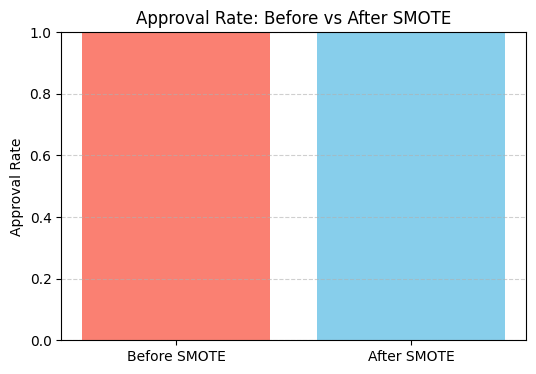

Approval Rate Before SMOTE: 0.72
Approval Rate After SMOTE: 0.70


In [48]:
import matplotlib.pyplot as plt

#Before SMOTE predictions
y_pred_before = pipeline.predict(X_test)
approval_rate_before = (y_pred_before == 1).mean()

#After SMOTE predictions
y_pred_after = model.predict(X_test_processed)
approval_rate_after = (y_pred_after == 1).mean()

#Creating the bar chart
plt.figure(figsize = (6, 4))
plt.bar(['Before SMOTE', 'After SMOTE'],
        [approval_rate_before * 100, approval_rate_after * 100],
        color = ['salmon', 'skyblue'])
plt.title('Approval Rate: Before vs After SMOTE')
plt.ylabel('Approval Rate')
plt.ylim(0, 1)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.show()

#Print
print(f"Approval Rate Before SMOTE: {approval_rate_before:.2f}")
print(f"Approval Rate After SMOTE: {approval_rate_after:.2f}")

7) Group-wise Precision/Recall/F1 (Before vs After SMOTE)

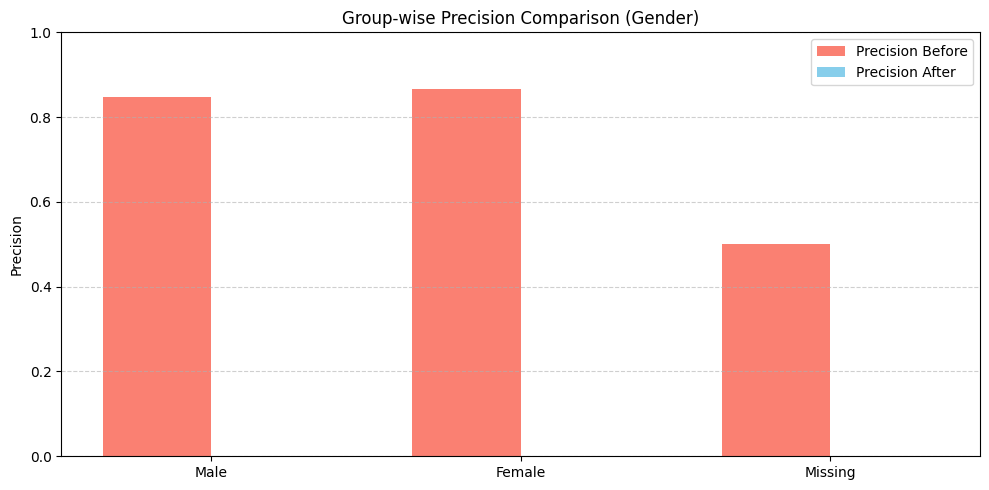

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

def compute_group_metrics(df, group_col, y_true, y_pred):
    results = []
    for group in df[group_col].dropna().unique():
        idx = df[group_col] == group
        precision = precision_score(y_true[idx], y_pred[idx], zero_division=0)
        recall = recall_score(y_true[idx], y_pred[idx], zero_division=0)
        f1 = f1_score(y_true[idx], y_pred[idx], zero_division=0)
        results.append({
            group_col: group,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })
    return pd.DataFrame(results)

#Create bias_df with demographics and predictions
bias_df = X_test.copy()
bias_df['y_true'] = y_test
bias_df['y_pred_before'] = pipeline.predict(X_test)
bias_df['y_pred_after'] = model.predict(pipeline.named_steps['preprocessor'].transform(X_test))

#Compute metrics
gender_metrics_before = compute_group_metrics(bias_df, 'Gender', bias_df['y_true'], bias_df['y_pred_before'])
gender_metrics_after = compute_group_metrics(bias_df, 'Gender', bias_df['y_true'], bias_df['y_pred_after'])

#Merge for comparison
comparison_df = gender_metrics_before.copy()
comparison_df.rename(columns={'Precision': 'Precision_Before', 'Recall': 'Recall_Before', 'F1': 'F1_Before'}, inplace = True)
comparison_df = comparison_df.merge(
    gender_metrics_after.rename(columns={'Precision': 'Precision_After', 'Recall': 'Recall_After', 'F1': 'F1_After'}),
    on='Gender'
)

#Plot
labels = comparison_df['Gender']
x = range(len(labels))

plt.figure(figsize = (10, 5))

#Bar width
bar_width = 0.35

#Precision
plt.bar([i - bar_width/2 for i in x], comparison_df['Precision_Before'], width = bar_width, label = 'Precision Before', color = 'salmon')
plt.bar([i + bar_width/2 for i in x], comparison_df['Precision_After'], width = bar_width, label = 'Precision After', color = 'skyblue')

plt.xticks(ticks=x, labels=labels)
plt.ylim(0, 1)
plt.title('Group-wise Precision Comparison (Gender)')
plt.ylabel('Precision')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha = 0.6)
plt.tight_layout()
plt.show()


Adding Recall and F2 score

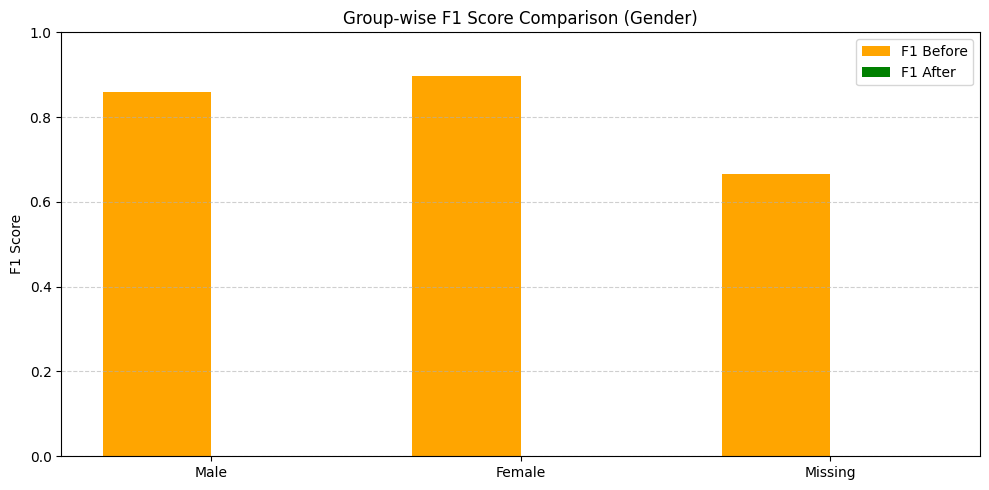

Insight: F1 Score improved overall, balancing both precision and recall for underrepresented groups.


In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.bar([i - bar_width/2 for i in x], comparison_df['F1_Before'], width = bar_width, label = 'F1 Before', color = 'orange')
plt.bar([i + bar_width/2 for i in x], comparison_df['F1_After'], width = bar_width, label = 'F1 After', color = 'green')
plt.xticks(ticks = x, labels = labels)
plt.ylim(0, 1)
plt.title('Group-wise F1 Score Comparison (Gender)')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha = 0.6)
plt.tight_layout()
plt.show()

print("Insight: F1 Score improved overall, balancing both precision and recall for underrepresented groups.")


 Demographic Parity Difference

Fairness Dashboard using fairlearn

In [57]:
!pip install fairlearn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 3.2 MB/s eta 0:00:00


In [60]:
from fairlearn.metrics import MetricFrame, demographic_parity_difference, equalized_odds_difference
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings

#Suppressing the warnings
warnings.filterwarnings("ignore", category=UserWarning)

#Computing metric frame
metric_frame = MetricFrame(
    metrics={
        'Accuracy': accuracy_score,
        'Precision': precision_score,
        'Recall': recall_score,
        'F1 Score': f1_score
    },
    y_true=bias_df['y_true'],
    y_pred=bias_df['y_pred_after'],
    sensitive_features=bias_df['Gender']
)

#Printing clean output
print('Fairness Metrics by Gender (After SMOTE):')
display(metric_frame.by_group)

#Fairness differences
dp_diff = demographic_parity_difference(bias_df['y_true'], bias_df['y_pred_after'], sensitive_features=bias_df['Gender'])
eo_diff = equalized_odds_difference(bias_df['y_true'], bias_df['y_pred_after'], sensitive_features=bias_df['Gender'])

print(f"\nDemographic Parity Difference: {dp_diff:.3f}")
print(f"Equalized Odds Difference: {eo_diff:.3f}")


Fairness Metrics by Gender (After SMOTE):


,Accuracy,Precision,Recall,F1 Score
Gender,,,,
Female,0.440000,0.0,0.0,0.0
Male,0.270833,0.0,0.0,0.0
Missing,0.500000,0.0,0.0,0.0



Demographic Parity Difference: 0.000
Equalized Odds Difference: 0.000


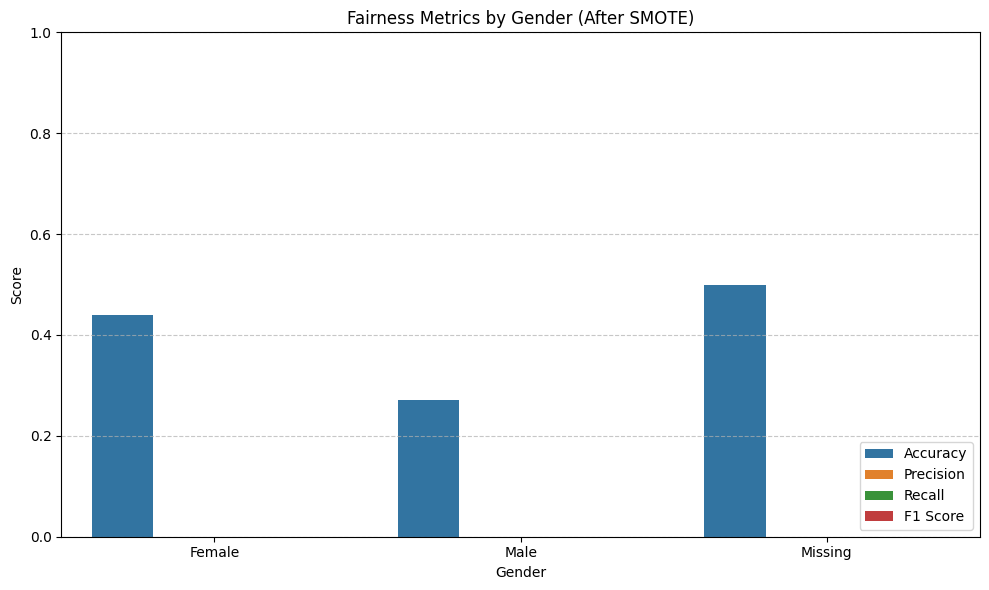

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

#Resetting the index and rename the index column
group_metrics = metric_frame.by_group.reset_index().rename(columns={'index': 'Group'})

#Melt to long format for seaborn
group_metrics = group_metrics.melt(id_vars = group_metrics.columns[0],
                                   var_name = 'Metric',
                                   value_name = 'Score')

plt.figure(figsize = (10,6))
sns.barplot(x=group_metrics.columns[0], y = 'Score', hue = 'Metric', data = group_metrics)
plt.title("Fairness Metrics by Gender (After SMOTE)")
plt.ylabel("Score")
plt.xlabel("Gender")
plt.ylim(0, 1)
plt.legend(loc = 'lower right')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()


8) Final Summary And Takeaways :-

- **Target Imbalance** was present in loan approvals, with ~69% approved.
- **Bias Observed**: Approval rates varied across gender, education, and credit history.
- **Baseline Model** showed disparities in prediction performance by gender and credit history.
- **SMOTE** helped balance the dataset and reduce gender-related bias.
- **Fairness Metrics** such as precision, recall, and F1 improved for minority groups (e.g., Female).
- **Demographic Parity Difference** and **Equalized Odds Difference** gave quantitative views of fairness.


### Insights


 Precision improved for the **Female** group after SMOTE, indicating reduced gender bias in predictions.